In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('Covid Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [7]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [8]:
df = df.replace( 'No', 0 )
df = df.replace( 'Yes', 1 )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non-null   int64
 10  Hyper Tension                            5434 non-null   int64
 11  Fati

<Axes: >

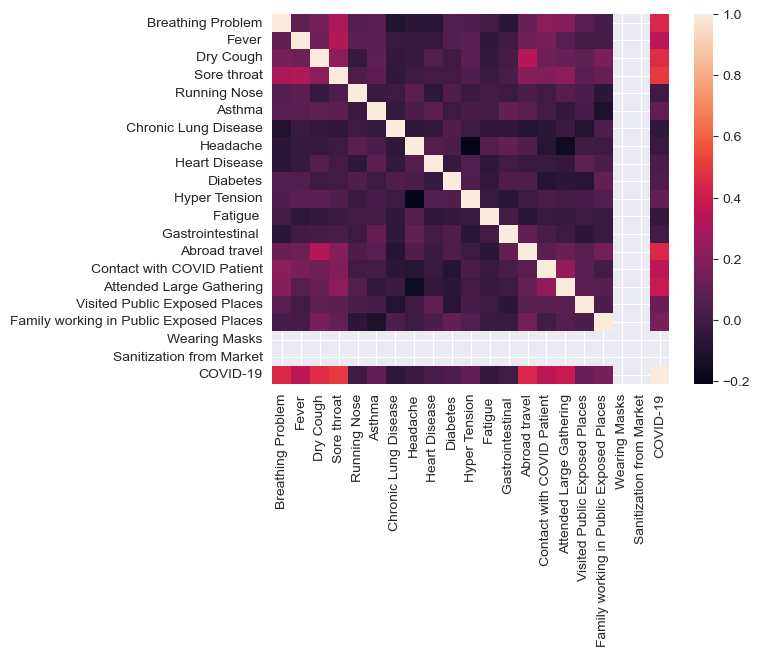

In [13]:
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

In [30]:
x = np.asanyarray( df.drop( columns=[ 'COVID-19' ] ) )
y = np.asanyarray( df[[ 'COVID-19' ]] ).ravel()

xtrain, xtest, ytrain, ytest = train_test_split( x, y )

model = Pipeline([
    # ('poly', PolynomialFeatures( degree=2, include_bias=False )),
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression( solver='lbfgs', max_iter=10000 ))
])

model.fit( xtrain, ytrain )

print('Train: ', model.score( xtrain, ytrain ))
print('Test: ', model.score( xtest, ytest ))

Train:  0.9739877300613496
Test:  0.9558498896247241


Text(0.5, 0, 'Importance')

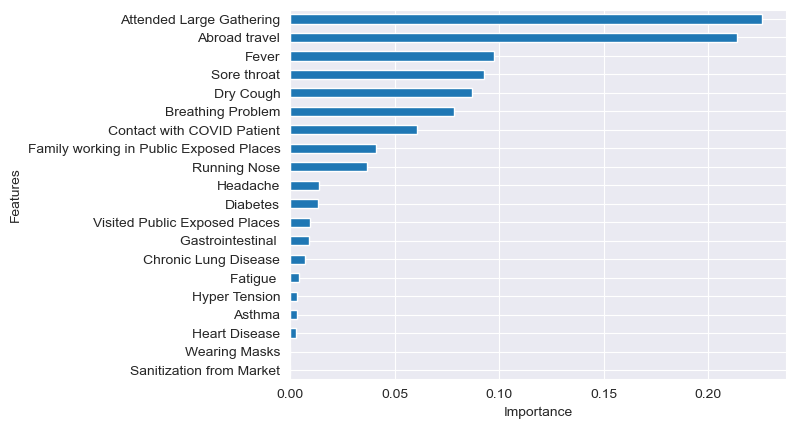

In [31]:
coef = np.abs( model.named_steps[ 'logit' ].coef_[ 0 ])
coef = coef / np.sum( coef )

labels = list( df.drop( columns=[ 'COVID-19' ]).columns )

features = pd.DataFrame()
features[ 'Features' ] = labels
features[ 'importance' ] = coef

features.sort_values( by=[ 'importance' ], ascending=True, inplace=True )
features.set_index( 'Features', inplace=True )
features.importance.plot( kind='barh' )
plt.xlabel( 'Importance' )

In [82]:
def get_classification_report( _model ):
    y_pred = _model.predict( xtest )
    print( classification_report( ytest, y_pred ) )

    return y_pred

In [84]:
preds = get_classification_report( model )

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       272
           1       0.97      0.98      0.97      1087

    accuracy                           0.96      1359
   macro avg       0.94      0.92      0.93      1359
weighted avg       0.96      0.96      0.96      1359


In [105]:
def plot_confusion_matrix( _preds ):
    _, ax = plt.subplots( figsize=( 20, 20 ) )

    ConfusionMatrixDisplay.from_predictions(
        y_pred = _preds,
        y_true = ytest,
        normalize = 'true',
        cmap = plt.cm.Blues,
        ax = ax
    )

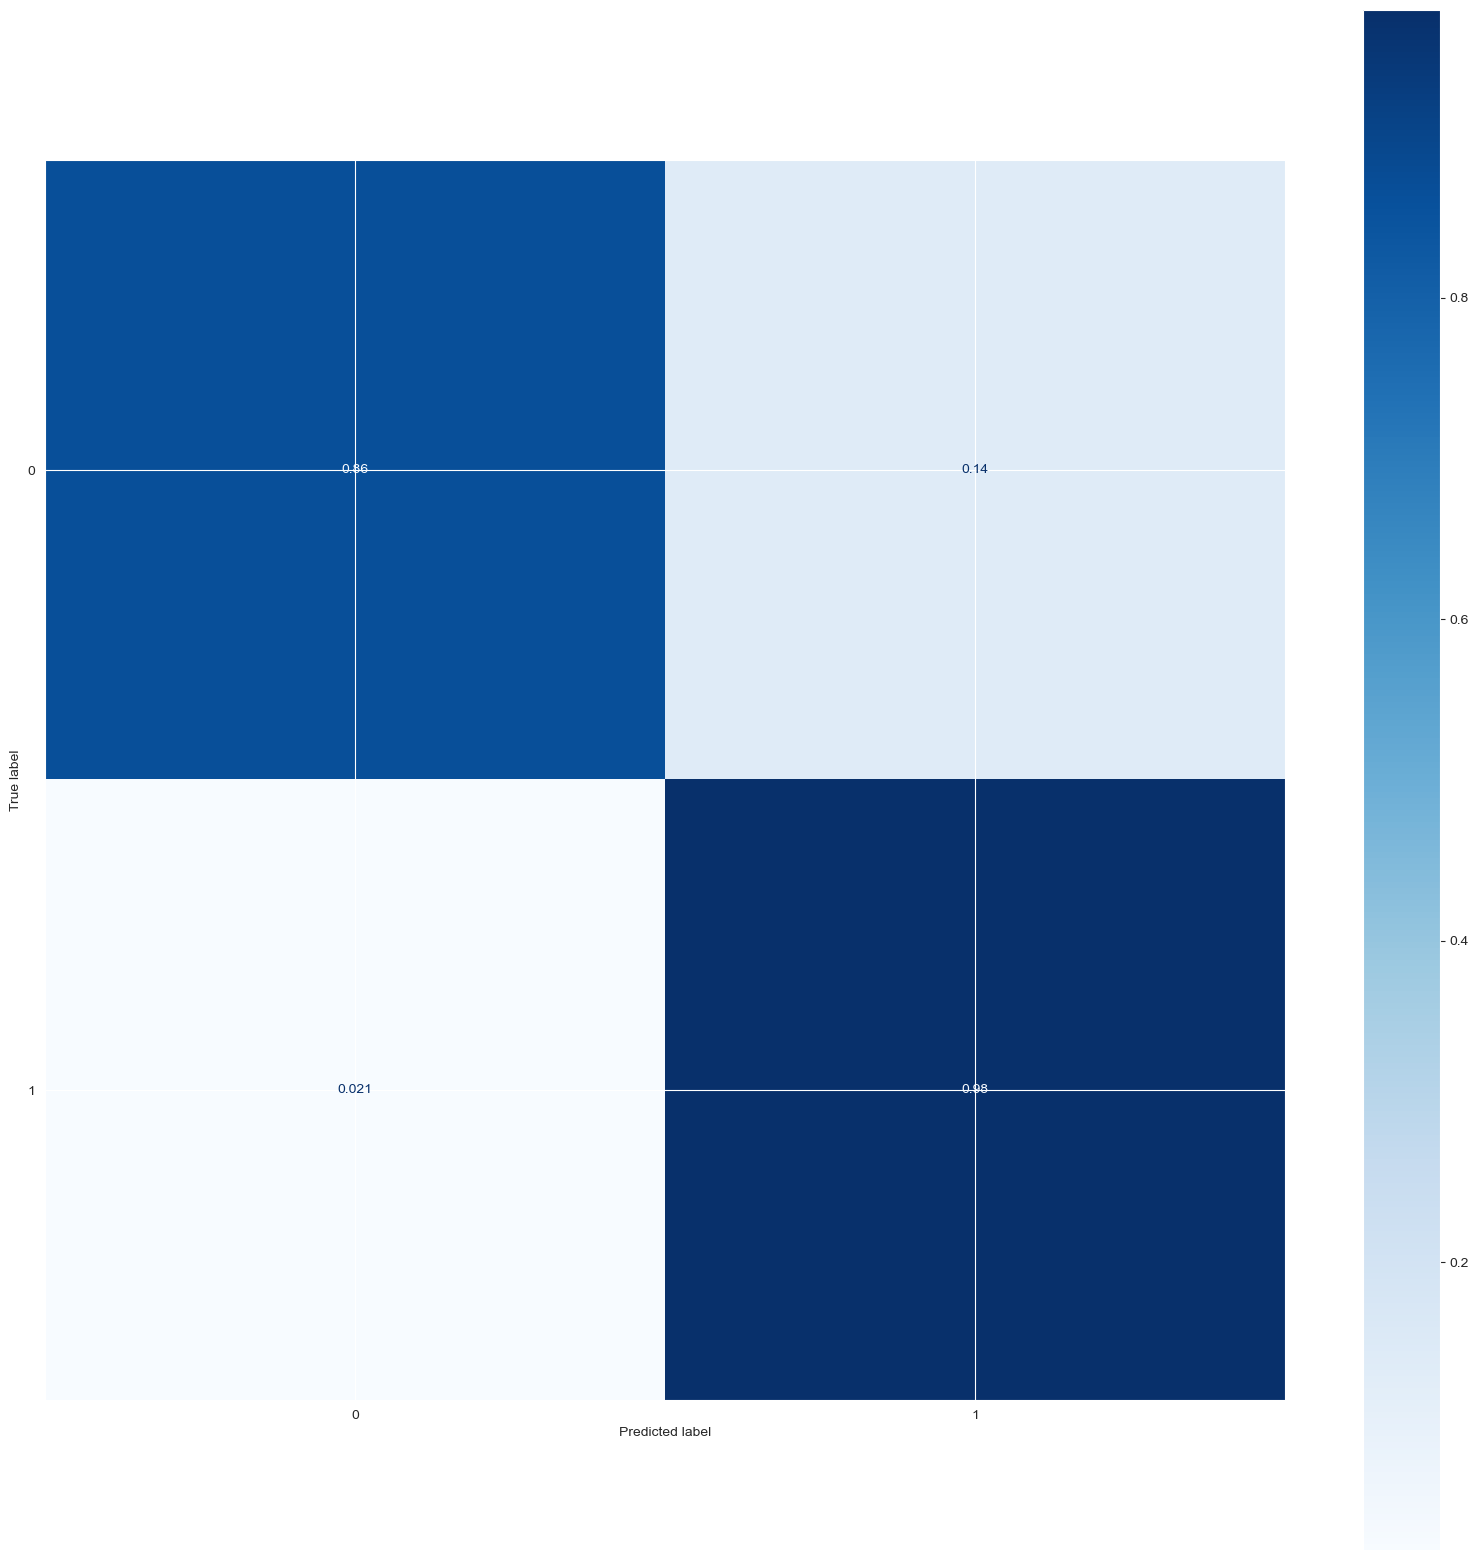

In [106]:
plot_confusion_matrix( preds )